## Problem 1 Direct Monte-Carlo simulation by rejection and the curse of dimensionality (4 points)


1. Write a code which samples by rejection the volume of an ellipsoid in 2D, 3D, 4D and 5D cases. The length of the longest principal semi-axis of the ellipsoid is a = 2, the rest of the semi-axis have the length equal to b = 1. 
2. Obtain the convergence towards an analytical result as a function of the number of samples for each case. Recommended number of samples for this task is about 100K or more. 
3. Calculate the sampling efficiency for each case. 
4. Compare the convergence, its standard deviation and the sampling efficiency in different dimen- sions. Do you observe any trend in performance?

### Solution

###1

We know that for an ellipsoid with principal semi-axes of length $a_i$ the implciit equation is $$\frac{x^2_i}{a^2_i} = 1$$

We shall generate n-tuples of random numbers of uniform kind in the range [-2;2] since lower ranges do not fully cover the ellipsoid and treat them as sampled from a parallelotope (never thought I'd actually use the term) in which the ellipsoid of interest is contained. rEjection is then trivial.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
import functools
plt.rcParams['figure.figsize'] = 16,14
plt.rcParams['font.size'] = 14

In [2]:
seed = sum(map(int, ' '.join(format(x, 'b') for x in bytearray('Palyulin forever!', 'utf-8')).replace(' ', '')))

In [3]:
seed

66

In [ ]:
def is_ellipsoid(x):
  a = np.ones_like(x)
  a[0] = 2
  return (x**2/a**2).sum()<=1

In [ ]:
def samplevol(dim,nsamples):
  rng = np.random.default_rng(seed)
  samples = 0
  steps = 0
  precision = []
  anal = (np.pi**(dim/2))/special.gamma(dim/2+1)*2
  print(anal)
  while samples<nsamples:
    cand = rng.random(dim)*4-2
    if is_ellipsoid(cand):
      samples+=1
      precision.append(abs(((samples/(steps+1)*(4**dim))-anal)/anal))
    steps+=1
  return samples/steps*(4**dim), np.array(precision), samples
  #return samples/steps

In [ ]:
samplevol(4, 100_000) #I've stolen your way of denoting thousands, actually super useful

9.869604401089358


(9.878669867973121,
 array([0.81472698, 0.73799775, 0.63638005, ..., 0.000907  , 0.00091547,
        0.00091852]),
 100000)

In [ ]:
samplevol(5, 100_000)

10.527578027828648


(10.52678542607678, array([5.51758819e-01, 2.24953496e-01, 2.45981889e-01, ...,
        7.11302009e-05, 8.23064124e-05, 7.52881384e-05]), 100000)

In [ ]:
samplevol(6, 100_000)

10.335425560099939


(10.355369429700529,
 array([0.36285072, 0.5030635 , 0.32022838, ..., 0.00193034, 0.00193385,
        0.00192966]),
 100000)

In [ ]:
samplevol(3, 100_000)

8.377580409572783


(8.345112111365522,
 array([1.54647909, 0.27323954, 0.27323954, ..., 0.00388905, 0.00388038,
        0.00387562]),
 100000)

In [ ]:
samplevol(2, 100_000)

6.283185307179586


(6.280790594516085,
 array([0.27323954, 0.27323954, 0.27323954, ..., 0.00037758, 0.0003872 ,
        0.00038113]),
 100000)

6.283185307179586
Efficiency of 2-dimensional sampling is 0.393
8.377580409572783
Efficiency of 3-dimensional sampling is 0.130
9.869604401089358
Efficiency of 4-dimensional sampling is 0.039
10.527578027828648
Efficiency of 5-dimensional sampling is 0.010


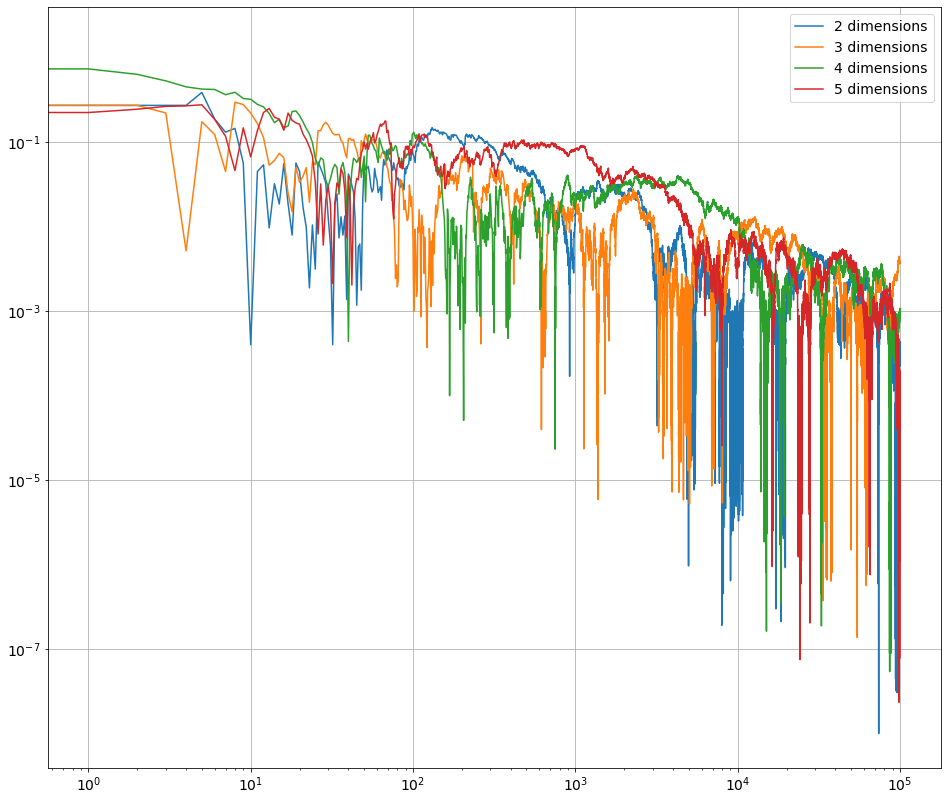

In [ ]:
accs1 = {}
for d in range(2,6):
  a,b,c = samplevol(d, 100_000)
  accs1[d] = b
  print(f'Efficiency of {d}-dimensional sampling is {a/(4**d):.3f}')
  plt.plot(np.linspace(0,100_000,100_000), b, label = f'{d} dimensions')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.legend()

6.283185307179586
6.283185307179586
6.283185307179586
6.283185307179586
6.283185307179586
6.283185307179586
6.283185307179586
6.283185307179586
6.283185307179586
6.283185307179586
8.377580409572783
8.377580409572783
8.377580409572783
8.377580409572783
8.377580409572783
8.377580409572783
8.377580409572783
8.377580409572783
8.377580409572783
8.377580409572783
9.869604401089358
9.869604401089358
9.869604401089358
9.869604401089358
9.869604401089358
9.869604401089358
9.869604401089358
9.869604401089358
9.869604401089358
9.869604401089358
10.527578027828648
10.527578027828648
10.527578027828648
10.527578027828648
10.527578027828648
10.527578027828648
10.527578027828648
10.527578027828648
10.527578027828648
10.527578027828648


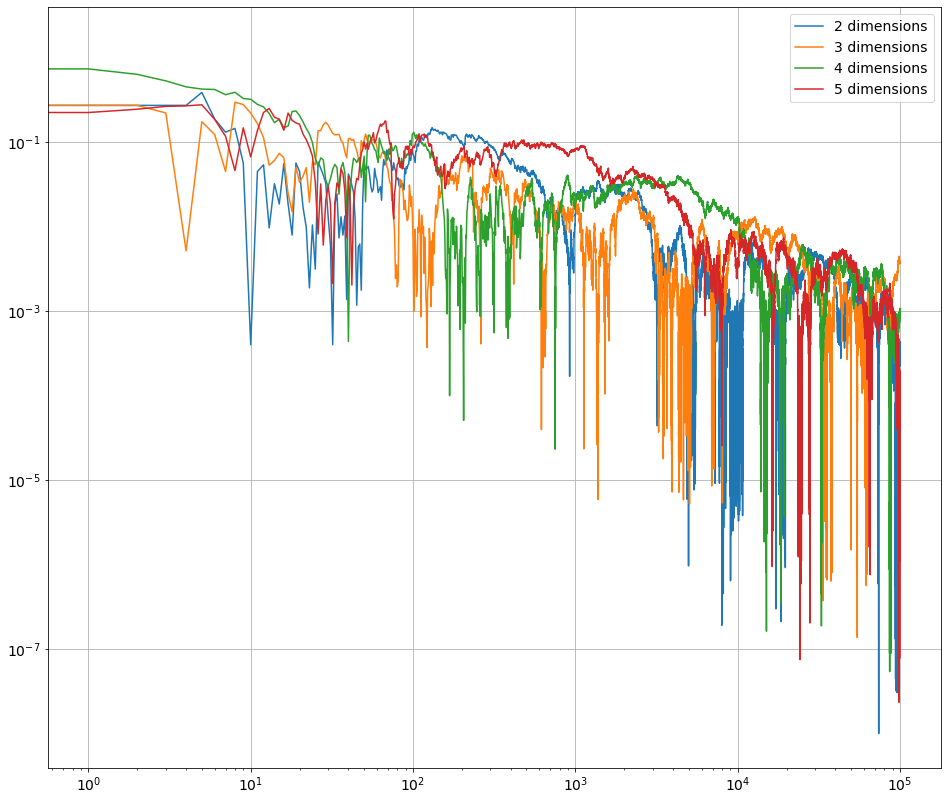

In [ ]:
#smoothed

accs = {}
for d in range(2,6):
  _ = np.zeros(100_000)
  for i in range(10):
    a,b,c = samplevol(d, 100_000)
    _+=b
  accs[d] = _/10
  plt.plot(np.linspace(0,100_000,100_000), accs[d], label = f'{d} dimensions')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [ ]:
#timing

import timeit

for d in range(2,6):
  print(f'Time to rejection sample in {d} dimensions:')
  
  %%timeit a,b,c = samplevol(d, 100_000)

Time to rejection sample in 2 dimensions:
6.283185307179586
6.283185307179586
6.283185307179586
6.283185307179586
6.283185307179586
6.283185307179586
1 loop, best of 5: 4.65 s per loop
Time to rejection sample in 3 dimensions:
8.377580409572783
8.377580409572783
8.377580409572783
8.377580409572783
8.377580409572783
8.377580409572783
1 loop, best of 5: 16.4 s per loop
Time to rejection sample in 4 dimensions:
9.869604401089358
9.869604401089358
9.869604401089358
9.869604401089358
9.869604401089358
9.869604401089358
1 loop, best of 5: 53.5 s per loop
Time to rejection sample in 5 dimensions:
10.527578027828648
10.527578027828648
10.527578027828648
10.527578027828648
10.527578027828648
10.527578027828648
1 loop, best of 5: 3min 25s per loop


In [ ]:
for a in accs1:
  print(accs1[a].std())

0.00727807725284291
0.006947597605288236
0.009435593166700482
0.011220099616055156


In [ ]:
accs1

{2: array([0.27323954, 0.27323954, 0.27323954, ..., 0.00037758, 0.0003872 ,
        0.00038113]),
 3: array([1.54647909, 0.27323954, 0.27323954, ..., 0.00388905, 0.00388038,
        0.00387562]),
 4: array([0.81472698, 0.73799775, 0.63638005, ..., 0.000907  , 0.00091547,
        0.00091852]),
 5: array([5.51758819e-01, 2.24953496e-01, 2.45981889e-01, ...,
        7.11302009e-05, 8.23064124e-05, 7.52881384e-05])}

We observe a marked performance drop with each upscale. The drop in efficiency of sampling is about three times. Standard deviations of accuracy evolution do not display a noticeable pattern. Overall convergence much slower at larger dimensions. 

## Importance sampling (4 points)

Let X be a standard normal distribution (μ = 0,σ = 1). Compute P(X ≥4) by using importance sampling Monte-Carlo. (Hint: use a sampling distribution with a peak of the density close to x = 4.). Then try to get this value by generating the values by Box-Mueller transform and rejecting the values for x ≤4. Compare the efficiency of two approaches.

Essentially we seek $\int_4^\infty Xdx = E[H(x-4)]$, where wwe take H to be Heaviside function.

If we pick, say, 4-shifted normal as proposal dist, we get $$E[H(x-4)e^{-.5(x^2-(x-4)^2)}] = E[H(x-4)e^{-.5(8x-16)}]$$

In [ ]:
def bxm(nsamples):
  samples = 0
  steps = 0
  rng = np.random.default_rng(seed)
  while samples<nsamples:
    z1 = rng.random()
    z2 = rng.random()
    x = np.cos(2*np.pi*z2)*np.sqrt(-2*np.log(z1))
    if x>=4:
      samples+=1
      #print(samples)
    steps+=1
  return samples/steps

In [ ]:
bxm(1000)

3.0135440724793512e-05

In [ ]:
def heaviside(x,a): #H(x-a)
  return x>=a

In [ ]:
def imp(nsamples):
  #initially I wanted to pick some wild very concentrated distrib, but then settled on shifted normal
  rng = np.random.default_rng(seed)
  cand = rng.standard_normal(nsamples)+4
  return (heaviside(cand, 4)*np.exp(8-4*cand)).sum()/nsamples

In [ ]:
def imp_explicit_reject(nsamples):
  samples = 0
  sm = 0
  steps = 0
  rng = np.random.default_rng(seed)
  while samples<nsamples:
    cand = rng.standard_normal()+4
    if cand>=4:
      samples+=1
      sm+=np.exp(8-4*cand)
      #print(samples)
    steps+=1
  return samples/steps, sm/2/samples

In [ ]:
imp(100_000)

3.1565846034445145e-05

In [ ]:
imp_explicit_reject(100_000)

(0.4993533374280307, 3.161271604007849e-05)

In [ ]:
#analytic


.5*(1+special.erf(-4/np.sqrt(2))) #uses symmetric property

3.167124183311998e-05

We get efficiency of order 10^(-5) with naive sampling and from about .5 all the way to 1 with importance sampling. 

## Problem 3 Metropolis-Hastings algorithm (2 points)

By using the Metropolis-Hastings algorithm sample the exponential distribution P(x) = exp(−x), x ∈[0,∞). Plot the histogram of sampled variables and superimpose the analytical formula.

In [ ]:
def target(x):
  return np.exp(-x)

In [ ]:
def metro_goldwyn_mayer(nsamples):
  x0 = 0
  x = x0
  samples = 0
  samplea = []
  rng = np.random.default_rng(seed)
  while samples<nsamples:
    y = rng.standard_normal()+x #no imagination whatsoever regarding the jump distrib
    ratio = min(1, target(y)/target(x))*(y>=0)
    if rng.random()<=ratio:
      x = y
    samplea.append(x)
    samples+=1
  return np.array(samplea)

In [ ]:
toplot = metro_goldwyn_mayer(100_000)

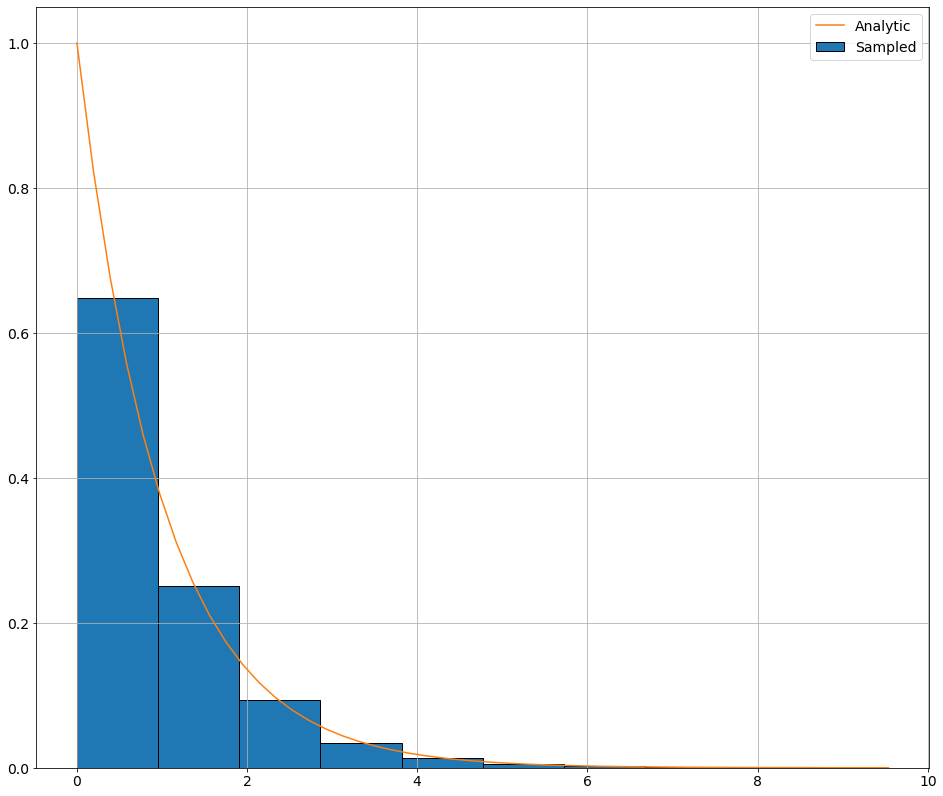

In [ ]:
a,b,c= plt.hist(toplot, density = True, edgecolor='black', label = 'Sampled')
plt.plot(np.linspace(b.min(), b.max()), target(np.linspace(b.min(), b.max())), label = 'Analytic')
plt.plot()
plt.grid(True)
plt.legend()
plt.show()

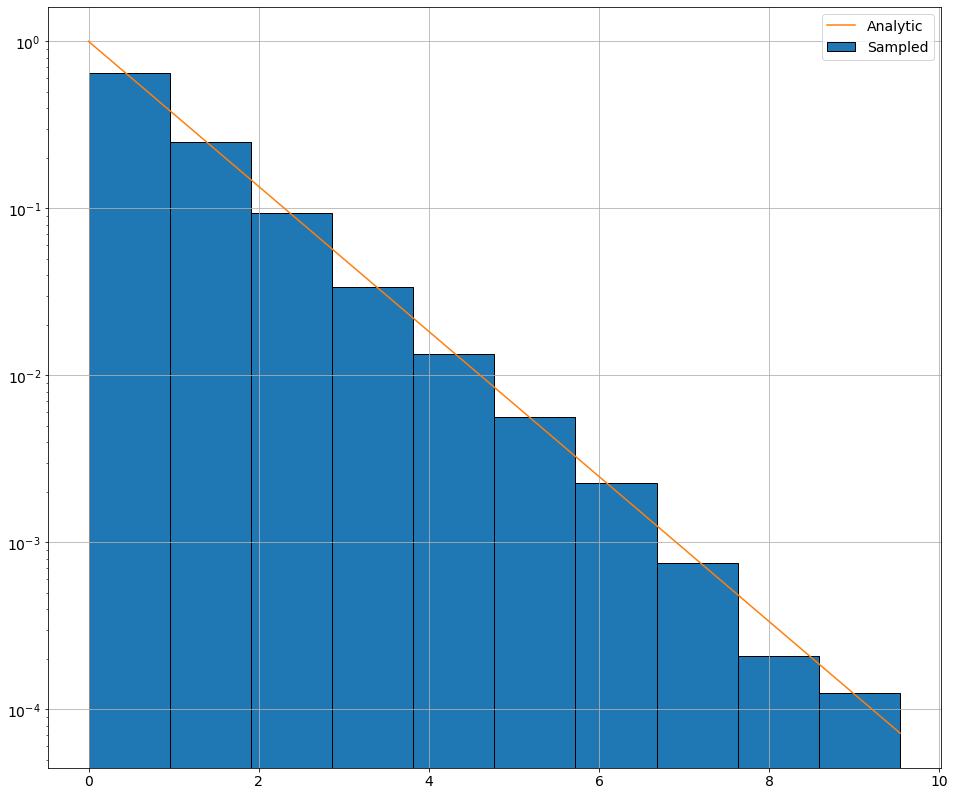

In [ ]:
a,b,c= plt.hist(toplot, density = True, edgecolor='black', label = 'Sampled')
plt.plot(np.linspace(b.min(), b.max()), target(np.linspace(b.min(), b.max())), label = 'Analytic')
plt.plot()
plt.grid(True)
plt.yscale('log')
plt.legend()
plt.show()